<a href="https://colab.research.google.com/github/arghac14/CropYield-prediction/blob/master/CropPrediction(single_district).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Creating Dataset(Bangalore District)

In [0]:
Bangalore_data={
    'Year':[1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002],
    'Precipitation':[698.485,996.754,819.437,933.128,602.847,941.275,1081.408,1091.201,1218.563,922.834,1000.767,731.834,748.194],
    'Min_Temp':[24.706,24.771,24.561,24.987,24.642,24.901,24.862,25.139,25.434,24.79,24.759,25.148,25.263],
    'Cloud_Cover':[48.424,48.394,48.394,48.394,48.394,48.394,50.766,80.049,50.213,48.408,49.684,52.792,49.134],
    'Vapour_pressure':[21.208,21.37,21.085,21.193,21.191,21.488,21.311,21.435,21.766,21.108,21.265,21.484,21.56],
    'Area':[18057,18070,18079,18051,17609,18050,17802,18042,17650,18123,17890,18090,18790],
    'Production':[16072,20353,20847,18124,22822,15432,21371,18076,19870,17652,18562,19087,20981]
}
df1=pd.DataFrame(Bangalore_data)


### Showing correlation between dependent and independent variables

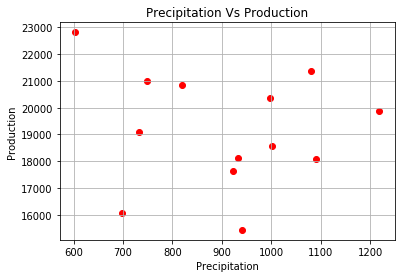

In [94]:
plt.scatter(df1['Precipitation'],df1['Production'],color='red')
plt.title("Precipitation Vs Production")
plt.xlabel("Precipitation")
plt.ylabel("Production")
plt.grid()
plt.show()

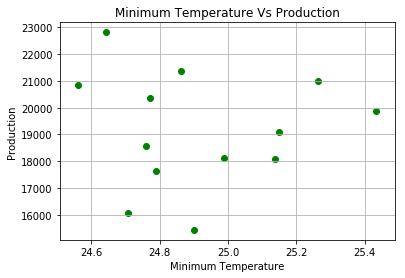

In [95]:
plt.scatter(df1['Min_Temp'],df1['Production'],color='green')
plt.title("Minimum Temperature Vs Production")
plt.xlabel("Minimum Temperature")
plt.ylabel("Production")
plt.grid()
plt.show()

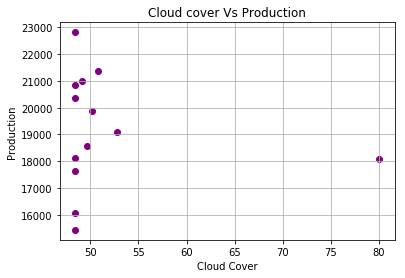

In [96]:
plt.scatter(df1['Cloud_Cover'],df1['Production'],color="purple")
plt.title("Cloud cover Vs Production")
plt.xlabel("Cloud Cover")
plt.ylabel("Production")
plt.grid()
plt.show()

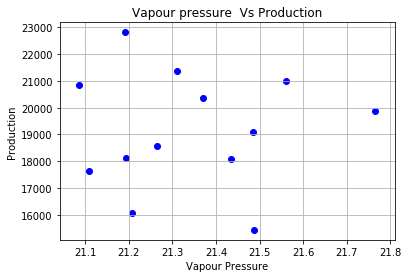

In [97]:
plt.scatter(df1['Vapour_pressure'],df1['Production'],color='blue')
plt.title("Vapour pressure  Vs Production")
plt.xlabel("Vapour Pressure")
plt.ylabel("Production")
plt.grid()
plt.show()

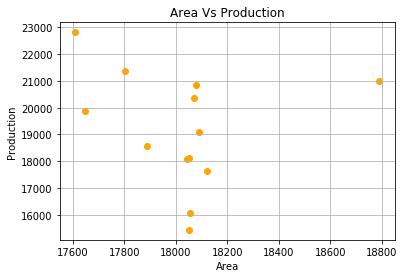

In [98]:
plt.scatter(df1['Area'],df1['Production'],color='orange')
plt.title("Area Vs Production")
plt.xlabel("Area")
plt.ylabel("Production")
plt.grid()
plt.show()

## Regression :

In [0]:

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [100]:

X = df1[['Precipitation'	,'Min_Temp'	,'Cloud_Cover'	,'Vapour_pressure'	,'Area']] 
Y = df1['Production']
 
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=1)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
  



# prediction
y_pred=reg.predict(x_test)
print('Predicted Production:',y_pred,'\n')

# Coefficients
print('\nCoefficients: ', reg.coef_,'\n')

# R-squared score
print('\nR-squared score: ', r2_score(y_test,y_pred),'\n')

Predicted Production: [17411.62930858 19930.96623757 14399.347497  ] 


Coefficients:  [ 7.45267074e+00  5.22418245e+03 -7.59047872e+01 -4.37591509e+03
  2.88812688e+00] 


R-squared score:  -6.72837744677466 



### Regression (Predicting Production for each year without taking that year as training data) :

In [101]:
error=[]
year=1990
for i in range(0,13):
  
  X = df1[['Precipitation'	,'Min_Temp'	,'Cloud_Cover'	,'Vapour_pressure'	,'Area']] .drop(0)
  Y = df1['Production'].drop(i)

  x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=1)
  reg=linear_model.LinearRegression()
  reg.fit(x_train,y_train)

  y_pred=reg.predict([df1.loc[i,'Precipitation':'Area']])
  print('~ Year:',year,'-\n','Predicted Production:',y_pred,', ','Actual Production:',[df1.loc[i,'Production']],', ','Error: ',y_pred-df1.loc[i,'Production'])
  error.append(float(y_pred-df1.loc[i,'Production']))
  year+=1

~ Year: 1990 -
 Predicted Production: [19826.27035642] ,  Actual Production: [16072] ,  Error:  [3754.27035642]
~ Year: 1991 -
 Predicted Production: [18354.3978197] ,  Actual Production: [20353] ,  Error:  [-1998.6021803]
~ Year: 1992 -
 Predicted Production: [18651.4788267] ,  Actual Production: [20847] ,  Error:  [-2195.5211733]
~ Year: 1993 -
 Predicted Production: [20331.51348138] ,  Actual Production: [18124] ,  Error:  [2207.51348138]
~ Year: 1994 -
 Predicted Production: [19143.37294242] ,  Actual Production: [22822] ,  Error:  [-3678.62705758]
~ Year: 1995 -
 Predicted Production: [18501.97718374] ,  Actual Production: [15432] ,  Error:  [3069.97718374]
~ Year: 1996 -
 Predicted Production: [17464.16215405] ,  Actual Production: [21371] ,  Error:  [-3906.83784595]
~ Year: 1997 -
 Predicted Production: [21171.16526168] ,  Actual Production: [18076] ,  Error:  [3095.16526168]
~ Year: 1998 -
 Predicted Production: [16911.42862506] ,  Actual Production: [19870] ,  Error:  [-2958.5

#### Error:

In [102]:
import math
print(list(error))

total_error=0
for i in error:
  total_error=total_error+(i*i)
  
mean_squared_error=math.sqrt(total_error)/13

print("\nMean Squared Error: ",mean_squared_error)

[3754.270356424109, -1998.6021803003314, -2195.5211732999305, 2207.5134813811164, -3678.6270575798626, 3069.9771837437474, -3906.83784595177, 3095.1652616826905, -2958.571374941912, 2394.763159733746, -1126.0952161877103, 334.8465844961065, -1806.7586155808822]

Mean Squared Error:  748.6299004416321
